## Анализ результатов деятельности интернет-магазина
- Используя список гипотез, подготовленный с целью увеличения выручки крупного интернет-магазина, приоритизировать гипотезы. 
- Проанализировать результаты проведенного A/B-теста.

### Описание данных
#### Данные для первой части 
#### Таблица hypothesis:
    - Hypothesis — краткое описание гипотезы;
    - Reach — охват пользователей по 10-балльной шкале;
    - Impact — влияние на пользователей по 10-балльной шкале;
    - Confidence — уверенность в гипотезе по 10-балльной шкале;
    - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
#### Данные для второй части
#### Таблица orders:
    - transactionId — идентификатор заказа;
    - visitorId — идентификатор пользователя, совершившего заказ;
    - date — дата, когда был совершён заказ;
    - revenue — выручка заказа;
    - group — группа A/B-теста, в которую попал заказ.
#### Таблица visitors:
    - date — дата;
    - group — группа A/B-теста;
    - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import warnings

## Часть 1. Приоритизация гипотез.

In [2]:
hypothesis=pd.read_csv('/datasets/hypothesis.csv')
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.columns=hypothesis.columns.str.lower()  
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [4]:
hypothesis['ICE']=np.round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'],1)
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структура категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


### Наиболее перспективные гипотезы по ICE - это 8, 0, 7 и 6-ая, что неудивительно, ведь у них достаточно высокие значения оценок по предполагаемому влиянию на пользователя (impact) и уверенности оценивающего (confidence) при средних значениях затрат, необходимых на тестирование гипотезы (efforts).

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [5]:
hypothesis['RICE']=hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


## Вывод
1. На основе рассчитанных показателей можно сделать вывод, что самой первой в очередь на проверку имеет смысл поставить гипотезу №7, т.к. ее изменения достаточно сильно (Impact=7) скажутся на макимальном количестве пользователей (reach = 10) - в этом в большой мере уверен оценивающий(confidence=8) - при средних затратах на ее проведение (efforts=5).
2. Следующие после гипотезы №7 в рейтинге по показателю RICE гипотезы значительно уступают ей по величине показателя RICE (в 2 раза и более) из-за отставания по отдельным его составляющим показателям - либо охват пользователей мал (гипотеза №0, reach = 3), либо влияние изменения на пользователей невелико (гипотезы №2,6, impact=3). Поэтому тестирование этих гипотез имеет смысл проводить, если показатель, по которому оценка небольшая не является важным для эксперимента.

## Часть 2. Анализ A/B-теста

In [6]:
orders=pd.read_csv('/datasets/orders.csv')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.agg(['min','max','nunique'])

,transactionId,visitorId,date,revenue,group
min,1062393,5114589,2019-08-01,50,A
max,4293855558,4283872382,2019-08-31,1294500,B
nunique,1197,1031,31,713,2


In [8]:
visitors=pd.read_csv('/datasets/visitors.csv')
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visitors.agg(['min','max','nunique'])

,date,group,visitors
min,2019-08-01,A,361
max,2019-08-31,B,770
nunique,31,2,58


### В таблицах "orders" и "visitors" представлена информация за август 2019 года - в сумме в обеих группах (А и В) за это время 1031 уникальный пользователь сделал 1197 заказов.

### Преобразуем формат дат в таблицах "orders" и "visitors"

In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()
print()
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Проверим таблицу "orders" на наличие одинаковых Id пользователей в группах А и В, чего быть не должно:
    1. Посчитаем, во сколько групп входит каждый уникальный пользователь - в идеальном варианте в случае "правильных" данных должен входить только в одну.
    2. Создадим список пользователей, которые почему-то входят одновременно в обе тестовые группы.

In [11]:
user_group_counts=orders.groupby(['visitorId']).agg({'group':'nunique'}).reset_index()
wrong_user_list=user_group_counts[user_group_counts['group']>1]['visitorId'].drop_duplicates()
print()
print(len(wrong_user_list),'пользователей, которые одновременно присутствуют в обеих тестовых группах')
orders[orders['visitorId'].isin(wrong_user_list)].groupby(['visitorId','group']).agg({'transactionId':'nunique'})


58 пользователей, которые одновременно присутствуют в обеих тестовых группах


transactionId
visitorId  group               
8300375    A                  1
           B                  1
199603092  A                  4
           B                  1
232979603  A                  1
...                         ...
4186807279 B                  2
4256040402 A                  7
           B                  4
4266935830 A                  1
           B                  1

[116 rows x 1 columns]

### Очистим таблицу "orders" от строк с повторяющимися в обеих группах пользователями (58 пользователей)

In [12]:
orders=orders[~orders['visitorId'].isin(wrong_user_list)]

In [13]:
orders.shape

(1016, 5)

### Проанализируем результаты A/B-теста

### 1. Построим график кумулятивной выручки по группам:
    1. Сгруппируем данные таблицы "orders" по датам и тестовым группам, рассчитав число заказов и уникальных заказчиков в каждой группе, а также сумму выручки.
    2. Объединим получившуюся таблицу с таблицей "visitors" и более удобно переименуем ее столбцы.
    3. Разделим получившуюся таблицу на две в зависимости от тестовой группы.
    4. Посчитаем для каждой тестовой группы кумулятивную выручку.
    5. Построим график кумулятивной выручки по группам.

In [14]:
grouped_orders=orders.groupby(['date', 'group']).agg({'transactionId' : 'count','visitorId' :'nunique','revenue' : 'sum'})
sum_table=grouped_orders.merge(visitors, on=['date', 'group'])
sum_table.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
warnings.filterwarnings('ignore')
sum_table_A=sum_table[sum_table['group']=='A']
sum_table_B=sum_table[sum_table['group']=='B']
sum_table_A['cum_revenue']=sum_table_A['revenue'].cumsum()
sum_table_B['cum_revenue']=sum_table_B['revenue'].cumsum()
sum_table_B.head(3)

,date,group,orders,buyers,revenue,visitors,cum_revenue
1,2019-08-01,B,17,17,59758,713,59758
3,2019-08-02,B,23,22,162043,581,221801
5,2019-08-03,B,14,14,67049,509,288850


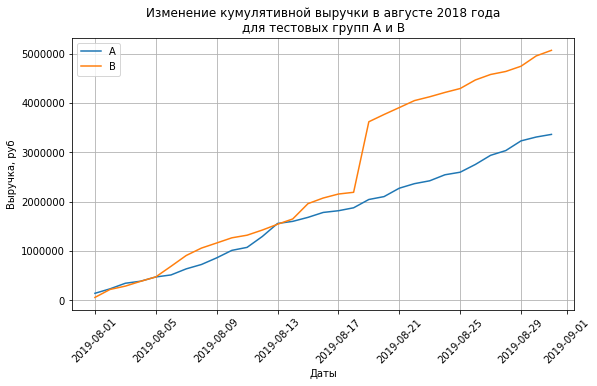

In [15]:
# Строим график выручки группы А
plt.figure(figsize=(9,5))
plt.plot(sum_table_A['date'], sum_table_A['cum_revenue'], label='A')
# Строим график выручки группы B
plt.plot(sum_table_B['date'], sum_table_B['cum_revenue'], label='B')
plt.legend() 
plt.grid(True)
plt.title('Изменение кумулятивной выручки в августе 2018 года\nдля тестовых групп А и В')
plt.xticks(rotation=45)
plt.xlabel('Даты')
plt.ylabel('Выручка, руб')
plt.show()

### Из графика видно, что примерно полмесяца выручки в тестовых группах росли приблизительно одинаково - в группе В выручка немного опережала выручку в группе А. Однако после крупного заказа 19 августа, выручка в группе В резко "вырвалась вперед" - похоже на выброс, который искажает результаты исследования.

### 2. Построим график кумулятивного среднего чека по группам:
    1. Рассчитаем кумулятивное число заказов и разделим кумулятивную выручку на кумулятивное число заказов для каждой тестовой группы.
    2. Построим график кумулятивного среднего чека по группам.

In [16]:
sum_table_A['cum_orders']=sum_table_A['orders'].cumsum()
sum_table_B['cum_orders']=sum_table_B['orders'].cumsum()
sum_table_A['revenue_per_order']=np.round(sum_table_A['cum_revenue']/sum_table_A['cum_orders'],2)
sum_table_B['revenue_per_order']=np.round(sum_table_B['cum_revenue']/sum_table_B['cum_orders'],2)
sum_table_B.head(3)

,date,group,orders,buyers,revenue,visitors,cum_revenue,cum_orders,revenue_per_order
1,2019-08-01,B,17,17,59758,713,59758,17,3515.18
3,2019-08-02,B,23,22,162043,581,221801,40,5545.02
5,2019-08-03,B,14,14,67049,509,288850,54,5349.07


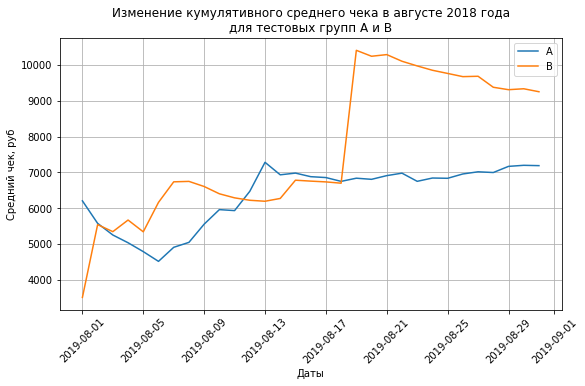

In [17]:
plt.figure(figsize=(9,5))
plt.plot(sum_table_A['date'], sum_table_A['revenue_per_order'], label='A')
plt.plot(sum_table_B['date'], sum_table_B['revenue_per_order'], label='B')
plt.legend() 
plt.grid(True)
plt.title('Изменение кумулятивного среднего чека в августе 2018 года\nдля тестовых групп А и В')
plt.xticks(rotation=45)
plt.xlabel('Даты')
plt.ylabel('Cредний чек, руб')
plt.show()

### На графике кумулятивного среднего чека также видно, что 19 августа была совершена очень крупная покупка покупателем из группы В - число покупателей сильно не увеличилось, а сумма выручки возросла - следовательно резко вырос и средний чек. Если бы не крупаня покупка 19 числа, то не исключено, что к концу рассматриваемого периода группа А опередила бы группу В по рассматриваемому показателю. Из-за имеющегося выброса сложно судить о результатах тестирования, о том, установился ли процесс, прекратились ли колебания показателей.

### 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A:
    1. Объединим таблицы для данных по тестам А и В и рассчитаем показатель относительного изменения кумулятивного среднего чека.
    2. Построим график относительного изменения кумулятивного среднего чека группы B к группе A

In [18]:
sum_table_A_B=sum_table_A.merge(sum_table_B,on='date', suffixes=('_A', '_B'))
sum_table_A_B['rel_revenue_per_order']=sum_table_A_B['revenue_per_order_B']/sum_table_A_B['revenue_per_order_A']-1
sum_table_A_B.head(3)

,date,group_A,orders_A,buyers_A,revenue_A,visitors_A,cum_revenue_A,cum_orders_A,revenue_per_order_A,group_B,orders_B,buyers_B,revenue_B,visitors_B,cum_revenue_B,cum_orders_B,revenue_per_order_B,rel_revenue_per_order
0,2019-08-01,A,23,19,142779,719,142779,23,6207.78,B,17,17,59758,713,59758,17,3515.18,-0.433746
1,2019-08-02,A,19,18,91602,619,234381,42,5580.50,B,23,22,162043,581,221801,40,5545.02,-0.006358
2,2019-08-03,A,24,24,112473,507,346854,66,5255.36,B,14,14,67049,509,288850,54,5349.07,0.017831


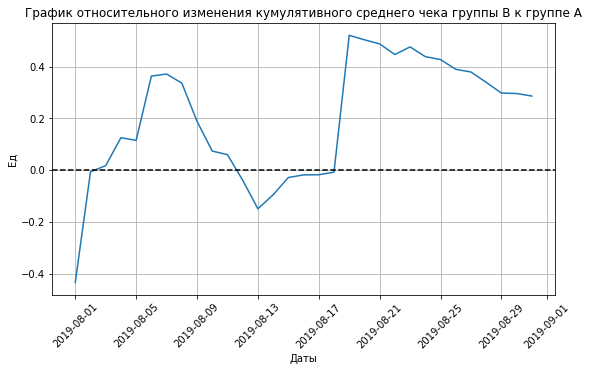

In [19]:
plt.figure(figsize=(9,5))
plt.plot(sum_table_A_B['date'], sum_table_A_B['rel_revenue_per_order']) 
plt.grid(True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.xlabel('Даты')
plt.ylabel('Ед')
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

### Из графика видно, что бОльшую часть месяца средний чек в группе В был выше, чем у группы А. Видно, что 2, 6, 14-15 и 19 числа происходили какие-то резкие изменения, которые приводили к росту среднего чека в группе В или/и же к падению среднего чека в группе А. Точно также 9-13 происходили события, которые приводили к росту среднего чека в группе А или/и падению среднего чека в группе В. 

### Изменение кумулятивной выручки за август 2018 года для тестовых групп А и В мы уже видели. Поскольку средний чек считается на основе данных по выручке и заказам, интересно посмотреть, как менялось число заказов в течении рассматриваемого периода.

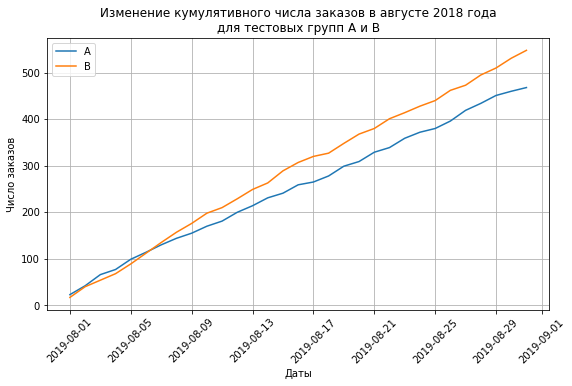

In [20]:
plt.figure(figsize=(9,5))
plt.plot(sum_table_A['date'], sum_table_A['cum_orders'], label='A')
plt.plot(sum_table_B['date'], sum_table_B['cum_orders'], label='B')
plt.legend() 
plt.grid(True)
plt.title('Изменение кумулятивного числа заказов в августе 2018 года\nдля тестовых групп А и В')
plt.xticks(rotation=45)
plt.xlabel('Даты')
plt.ylabel('Число заказов')
plt.show()

### Число заказов равномерно росло без каких либо резких скачков; группа В, начиная с 7-го числа и до конца месяца опережала группу А по количеству заказов.

### 4. Построим график кумулятивной конверсии по группам:
    1. Рассчитаем кумулятивное число посетителей и разделим кумулятивное число заказов на кумулятивное число посетителей для каждой тестовой группы.
    2. Построим график кумулятивной конверсии по группам.

In [21]:
sum_table_A['cum_visitors']=sum_table_A['visitors'].cumsum()
sum_table_B['cum_visitors']=sum_table_B['visitors'].cumsum()
sum_table_A['conversion']=np.round(sum_table_A['cum_orders']/sum_table_A['cum_visitors'],4)
sum_table_B['conversion']=np.round(sum_table_B['cum_orders']/sum_table_B['cum_visitors'],4)
sum_table_B.head(3)

,date,group,orders,buyers,revenue,visitors,cum_revenue,cum_orders,revenue_per_order,cum_visitors,conversion
1,2019-08-01,B,17,17,59758,713,59758,17,3515.18,713,0.0238
3,2019-08-02,B,23,22,162043,581,221801,40,5545.02,1294,0.0309
5,2019-08-03,B,14,14,67049,509,288850,54,5349.07,1803,0.0300


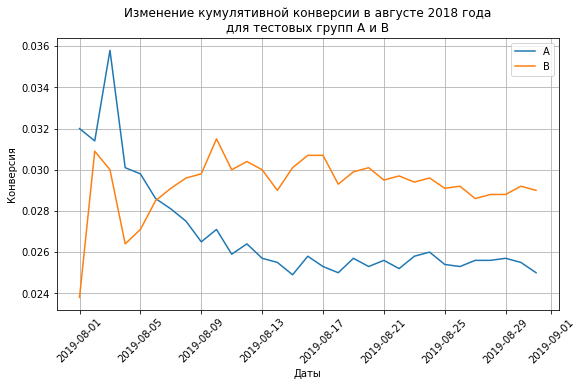

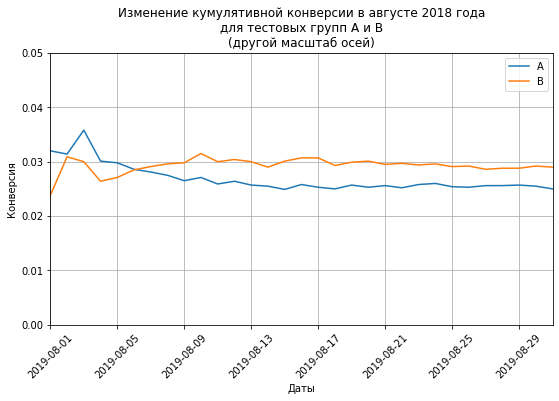

In [22]:
plt.figure(figsize=(9,5))
plt.plot(sum_table_A['date'], sum_table_A['conversion'], label='A')
plt.plot(sum_table_B['date'], sum_table_B['conversion'], label='B')
plt.legend() 
plt.grid(True)
plt.title('Изменение кумулятивной конверсии в августе 2018 года\nдля тестовых групп А и В')
plt.xticks(rotation=45)
plt.xlabel('Даты')
plt.ylabel('Конверсия')
plt.show()
plt.figure(figsize=(9,5))
plt.plot(sum_table_A['date'], sum_table_A['conversion'], label='A')
plt.plot(sum_table_B['date'], sum_table_B['conversion'], label='B')
plt.legend() 
plt.grid(True)
plt.title('Изменение кумулятивной конверсии в августе 2018 года\nдля тестовых групп А и В\n(другой масштаб осей)')
plt.xticks(rotation=45)
plt.xlabel('Даты')
plt.ylabel('Конверсия')
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05]) 
plt.show()

### В начале периода для конверсий были характерны сильные колебания, однако к концу рассматриваемого месяца значения более или менее зафиксировались на интервалах 0,029 (группа В) и 0,026 (группа А). Группа В опережает группу А по показателю кумулятивной конверсии.

### 5. Построим график относительного изменения кумулятивной конверсии группы B к группе A:
    1. Объединим таблицы для данных по тестам А и В и рассчитаем показатель относительного изменения кумулятивной конверсии.
    2. Построим график относительного изменения кумулятивной конверсии группы B к группе A

In [23]:
sum_table_A_B_2=sum_table_A.merge(sum_table_B,on='date', suffixes=('_A', '_B'))
sum_table_A_B_2['rel_conversion']=sum_table_A_B_2['conversion_B']/sum_table_A_B_2['conversion_A']-1
sum_table_A_B_2.head(3)

,date,group_A,orders_A,buyers_A,revenue_A,visitors_A,cum_revenue_A,cum_orders_A,revenue_per_order_A,cum_visitors_A,...,orders_B,buyers_B,revenue_B,visitors_B,cum_revenue_B,cum_orders_B,revenue_per_order_B,cum_visitors_B,conversion_B,rel_conversion
0,2019-08-01,A,23,19,142779,719,142779,23,6207.78,719,...,17,17,59758,713,59758,17,3515.18,713,0.0238,-0.256250
1,2019-08-02,A,19,18,91602,619,234381,42,5580.50,1338,...,23,22,162043,581,221801,40,5545.02,1294,0.0309,-0.015924
2,2019-08-03,A,24,24,112473,507,346854,66,5255.36,1845,...,14,14,67049,509,288850,54,5349.07,1803,0.0300,-0.162011


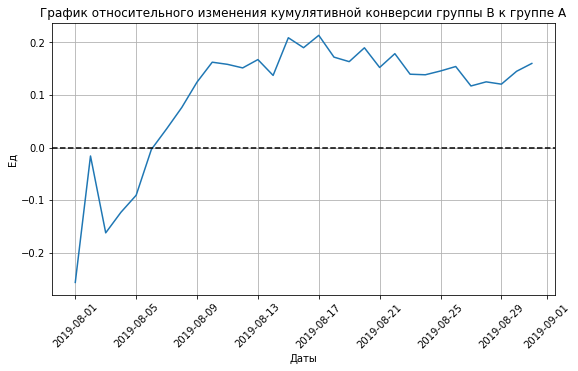

In [24]:
plt.figure(figsize=(9,5))
plt.plot(sum_table_A_B_2['date'], sum_table_A_B_2['rel_conversion']) 
plt.grid(True)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xticks(rotation=45)
plt.xlabel('Даты')
plt.ylabel('Ед')
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

### На графике относительного изменения кумулятивной конверсии хорошо видно, что, начиная с 6 августа конверсия в группе В превышала конверсию в группе А, и к концу периода сохранялась на уровне на 11-13% большем, чем конверсия у группы А.

### 6. Построим точечный график количества заказов по пользователям:
    1. Сгруппируем данные таблицы "orders" - посчитаем число заказов, приходящихся на 1 покупателя.
    2. Построим точечную диаграмму числа заказов на одного покупателя.

In [25]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique','group':'max'})
ordersByUsers.columns = ['userId','orders','group']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,userId,orders,group
908,3967698036,3,A
55,249864742,3,B
478,2108163459,3,A
687,2988190573,3,A
890,3908431265,3,A
138,611059232,3,A
632,2742574263,3,B
157,678354126,2,A
323,1404560065,2,B
452,1985475298,2,B


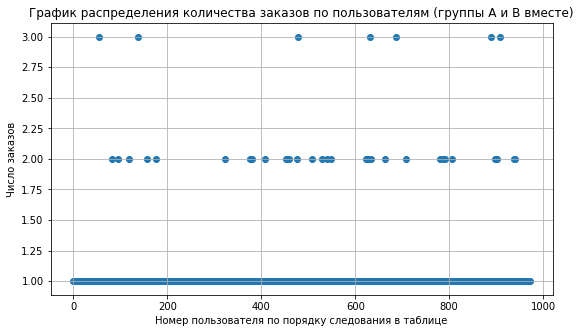

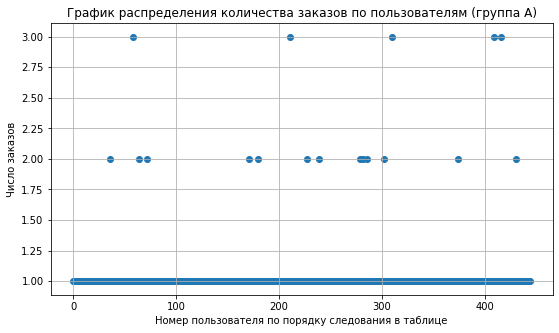

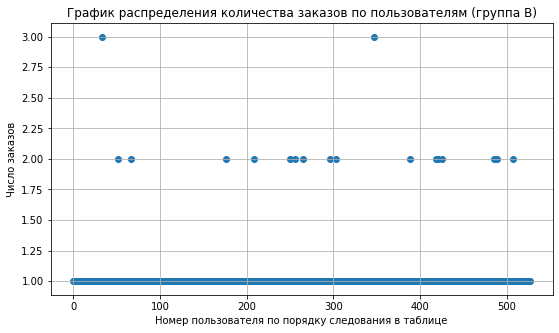

In [26]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(9,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.grid(True)
plt.title('График распределения количества заказов по пользователям (группы А и В вместе)')
plt.xlabel('Номер пользователя по порядку следования в таблице')
plt.ylabel('Число заказов')
plt.show() 

x_values = pd.Series(range(0,len(ordersByUsers[ordersByUsers['group']=='A'])))
plt.figure(figsize=(9,5))
plt.scatter(x_values, ordersByUsers[ordersByUsers['group']=='A']['orders']) 
plt.grid(True)
plt.title('График распределения количества заказов по пользователям (группа А)')
plt.xlabel('Номер пользователя по порядку следования в таблице')
plt.ylabel('Число заказов')
plt.show()

x_values = pd.Series(range(0,len(ordersByUsers[ordersByUsers['group']=='B'])))
plt.figure(figsize=(9,5))
plt.scatter(x_values, ordersByUsers[ordersByUsers['group']=='B']['orders']) 
plt.grid(True)
plt.title('График распределения количества заказов по пользователям (группа В)')
plt.xlabel('Номер пользователя по порядку следования в таблице')
plt.ylabel('Число заказов')
plt.show()

### Из графиков видно, что преобладающее большинство покупателей делали заказы только один раз, также есть некоторая доля покупателей, которые заказывали товары 2-3 раза.

### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [27]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

### Не более 5% пользователей оформляли больше чем 1 (т. е. от 2-ух) заказов и не более 1% пользователей оформляли больше чем 2 (т. е. от 3-ех) заказов. С учетом представленных выше графиков и рассчитанных перцентилей, примем границу для определения аномальных пользователей, равной 2 - все, что выше 2-ух - аномалия.

### 8. Построим точечный график стоимостей заказов.

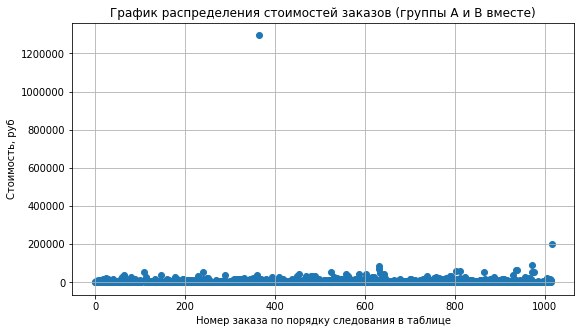

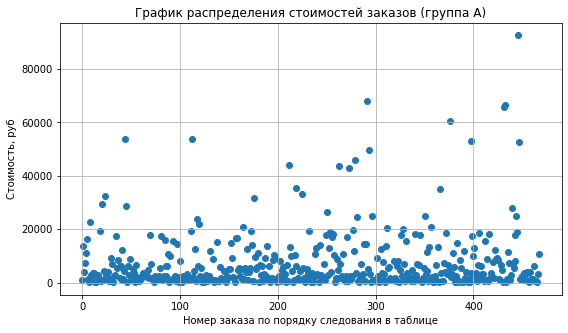

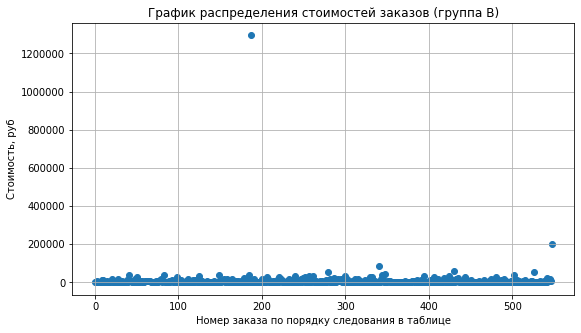

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(9,5))
plt.scatter(x_values, orders['revenue']) 
plt.grid(True)
plt.title('График распределения стоимостей заказов (группы А и В вместе)')
plt.xlabel('Номер заказа по порядку следования в таблице')
plt.ylabel('Стоимость, руб')
plt.show() 

x_values = pd.Series(range(0,len(orders[orders['group']=='A']['revenue'])))
plt.figure(figsize=(9,5))
plt.scatter(x_values, orders[orders['group']=='A']['revenue']) 
plt.grid(True)
plt.title('График распределения стоимостей заказов (группа А)')
plt.xlabel('Номер заказа по порядку следования в таблице')
plt.ylabel('Стоимость, руб')
plt.show()

x_values = pd.Series(range(0,len(orders[orders['group']=='B']['revenue'])))
plt.figure(figsize=(9,5))
plt.scatter(x_values, orders[orders['group']=='B']['revenue']) 
plt.grid(True)
plt.title('График распределения стоимостей заказов (группа В)')
plt.xlabel('Номер заказа по порядку следования в таблице')
plt.ylabel('Стоимость, руб')
plt.show()

In [29]:
orders[orders['revenue']>100000]

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


### Из графиков видно, что преобладающее большинство заказов имеет стоимость не более 100000 руб, однако есть два заказа, стоимость которых 202 740 руб и 1 294 500 руб. - это заказы, попавшие в тестовую группу В и, видимо, повлиявшие на скачок кумулятивной выручки (а также среднего чека) на графиках для данной группы 15-го и особенно 19-го числа.

### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [30]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

### Не более 5% заказов имели стоимость более, чем 26785 руб и не более 1% заказов имели стоимость более 53904 руб. С учетом представленных выше графиков и рассчитанных перцентилей, примем границу для определения аномальных заказов, равной 50000 руб - все, что выше - аномалия.

### 10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным:
    1. Определим в отдельные таблицы информацию о пользователях и количестве сделанных ими заказов для разных тестовых групп.
    2. Создадим выборки для тестовых групп А и В, в которых будет содержаться информация о количествх заказов у разных пользователей. Т.к. достаточно большое количество пользователей так и не стало покупателями, то определим (приблизительно) их число и добавим в данную выборку соответствующее число нулей.
    3. Рассчитаем статистическую значимость различий в конверсии между группами и относительный прирост конверсии группы B относительно группы А. Проверим гипотезы:
        - Н0: конверсии между группами равны;
        - Н1: конверсии между группами не равны.

### Используем для расчетов данные из созданных ранее таблиц "ordersByUsers", "sum_table_A" и "sum_table_B"

In [31]:
ordersByUsers.sort_values(by='orders',ascending=False).head()

,userId,orders,group
908,3967698036,3,A
55,249864742,3,B
478,2108163459,3,A
687,2988190573,3,A
890,3908431265,3,A


In [32]:
sum_table_A.head(3)

,date,group,orders,buyers,revenue,visitors,cum_revenue,cum_orders,revenue_per_order,cum_visitors,conversion
0,2019-08-01,A,23,19,142779,719,142779,23,6207.78,719,0.0320
2,2019-08-02,A,19,18,91602,619,234381,42,5580.50,1338,0.0314
4,2019-08-03,A,24,24,112473,507,346854,66,5255.36,1845,0.0358


In [33]:
ordersByUsersA=ordersByUsers[ordersByUsers['group']=='A']
ordersByUsersB=ordersByUsers[ordersByUsers['group']=='B']

In [34]:
zero_A=sum_table_A['visitors'].sum() - len(ordersByUsersA['orders'])
zero_B=sum_table_B['visitors'].sum() - len(ordersByUsersB['orders'])
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(zero_A), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(zero_B), name='orders')],axis=0)
alpha=.05
results=stats.mannwhitneyu(sampleA, sampleB)
print('Результаты для "сырых" данных:')
print("Статистическая значимость различий в конверсии между группами А и В: {0:.4f}".format(results[1]))
print("Относительный прирост конверсии группы B: {0:.4f}".format(sampleB.mean()/sampleA.mean()-1)) 
print()
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 

Результаты для "сырых" данных:
Статистическая значимость различий в конверсии между группами А и В: 0.0055
Относительный прирост конверсии группы B: 0.1598

Отвергаем нулевую гипотезу: разница статистически значима


### По «сырым» данным получается, что разница в конверсии групп A и B статистически значима - мы вынуждены отвергнуть нулевую гипотезу.
### Относительный прирост конверсии группы B составляет 15,98%.

### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.  
Проверим гипотезы:
    - Н0: средние чеки между группами равны;
    - Н1: средние чеки между группами не равны.

In [35]:
alpha=.05
results=stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('Результаты для "сырых" данных:')
print("Статистическая значимость различий в среднем чеке заказа между группами А и В: {0:.4f}".format(results[1]))
print("Относительный прирост в среднем чеке заказа группы B: {0:.4f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 
print()
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 

Результаты для "сырых" данных:
Статистическая значимость различий в среднем чеке заказа между группами А и В: 0.4147
Относительный прирост в среднем чеке заказа группы B: 0.2866

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


### По «сырым» данным получается, что причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Хотя средний чек группы B выше среднего чека группы A на 28,7%.

### 12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным:
    1. Определим список аномальных пользователей - тех, кто совершил более 2 заказов или совершил заказ дороже 50 000 рублей.
    2. Создадим выборки для тестовых групп А и В, в которых будет содержаться информация о количествх заказов у разных пользователей, исключив из них аномальных пользователей. Т.к. достаточно большое количество пользователей так и не стало покупателями, то определим (приблизительно) их число и добавим в данную выборку соответствующее число нулей.
    3. Рассчитаем статистическую значимость различий в конверсии между группами и относительный прирост конверсии группы B относительно группы А. Проверим гипотезы:
        - Н0: конверсии между группами равны;
        - Н1: конверсии между группами не равны.

In [36]:
usersWithManyOrders =ordersByUsers[ordersByUsers['orders']>2]['userId']
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print('Всего',abnormalUsers.shape[0],'аномальных пользователя') 

1099    148427295
55      249864742
138     611059232
1137    759473111
949     887908475
dtype: int64
Всего 22 аномальных пользователя


In [37]:
sampleAFiltered = pd.concat([ordersByUsersA[~(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(zero_A),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[~(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(zero_B),name='orders')],axis=0)
alpha=.05
results=stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('Результаты для "очищенных" данных')
print("Статистическая значимость различий в конверсии между группами А и В: {0:.4f}".format(results[1]))
print("Относительный прирост конверсии группы B: {0:.4f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
print()
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 

Результаты для "очищенных" данных
Статистическая значимость различий в конверсии между группами А и В: 0.0028
Относительный прирост конверсии группы B: 0.1980

Отвергаем нулевую гипотезу: разница статистически значима


### По «очищенным» данным получается, что разница в конверсии групп A и B статистически значима - мы вынуждены отвергнуть нулевую гипотезу.
### Относительный прирост конверсии группы B составляет 19,8%.

### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
Проверим гипотезы:
    - Н0: средние чеки между группами равны;
    - Н1: средние чеки между группами не равны.

In [38]:
alpha=.05
results=stats.mannwhitneyu(orders[(orders['group']=='A')&(~orders['visitorId'].isin(abnormalUsers))]['revenue'], orders[(orders['group']=='B')&(~orders['visitorId'].isin(abnormalUsers))]['revenue'])
print('Результаты для "очищенных" данных:')
print("Статистическая значимость различий в среднем чеке заказа между группами А и В: {0:.4f}".format(results[1]))
print("Относительный прирост в среднем чеке заказа группы B: {0:.4f}".format(orders[(orders['group']=='B')&(~orders['visitorId'].isin(abnormalUsers))]['revenue'].mean()/orders[(orders['group']=='A')&(~orders['visitorId'].isin(abnormalUsers))]['revenue'].mean()-1)) 
print()
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 

Результаты для "очищенных" данных:
Статистическая значимость различий в среднем чеке заказа между группами А и В: 0.4695
Относительный прирост в среднем чеке заказа группы B: 0.0110

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


### По «очищенным» данным получается, что причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Благодаря очистке данных от выбросов, средний чек группы B оказался всего лишь на 1% выше среднего чека группы A, в то время, как расчет на "сырых" данных давал разницу в 28,7%.

### Построим график кумулятивной выручки по группам на базе "очищенных" данных:
    1. Сгруппируем "очищенные" данные таблицы "orders" по датам и тестовым группам, рассчитав число заказов и уникальных заказчиков в каждой группе, а также сумму выручки.
    2. Объединим получившуюся таблицу с таблицей "visitors" и более удобно переименуем ее столбцы.
    3. Разделим получившуюся таблицу на две в зависимости от тестовой группы.
    4. Посчитаем для каждой тестовой группы кумулятивную выручку.
    5. Построим график кумулятивной выручки по группам.

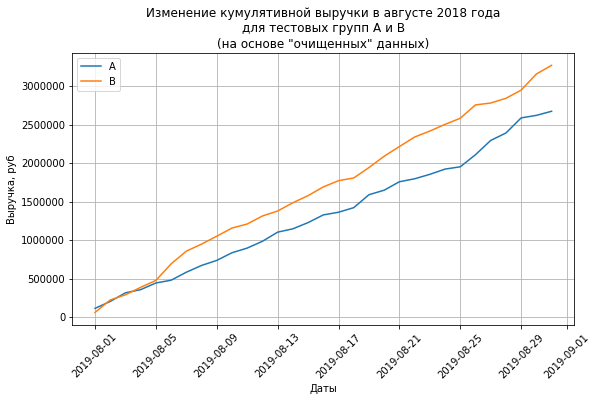

In [39]:
grouped_orders=orders[~orders['visitorId'].isin(abnormalUsers)].groupby(['date', 'group']).agg({'transactionId' : 'count','visitorId' :'nunique','revenue' : 'sum'})
sum_table=grouped_orders.merge(visitors, on=['date', 'group'])
sum_table.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
sum_table_A=sum_table[sum_table['group']=='A']
sum_table_B=sum_table[sum_table['group']=='B']
sum_table_A['cum_revenue']=sum_table_A['revenue'].cumsum()
sum_table_B['cum_revenue']=sum_table_B['revenue'].cumsum()
# Строим график выручки группы А
plt.figure(figsize=(9,5))
plt.plot(sum_table_A['date'], sum_table_A['cum_revenue'], label='A')
# Строим график выручки группы B
plt.plot(sum_table_B['date'], sum_table_B['cum_revenue'], label='B')
plt.legend() 
plt.grid(True)
plt.title('Изменение кумулятивной выручки в августе 2018 года\nдля тестовых групп А и В\n(на основе "очищенных" данных)')
plt.xticks(rotation=45)
plt.xlabel('Даты')
plt.ylabel('Выручка, руб')
plt.show()

### Полученный график подтверждает рост к концу месяца для группы В суммарной выручки за счет роста числа заказов, которое связано с повышением показателя конверсии для группы В по сравнению с группой А.

## Выводы:

    1. По неизвестной причине 58 уникальных пользователей присутствовали одновременно в обеих тестовых группах (А и В) - хорошо бы выяснить, как это произошло, чтобы в дальнейшем предотвратить такие ошибки в данных.
    2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по "очищенным" данным (что неудивительно, ведь для сравнения выборок использовался непараметрический тест Уилкоксона-Манна-Уитни, который нечувствителен к выбросам). Соответственно, "очищенные" данные показывают мЕньшую разницу между средним чеком для групп А и В, чем "сырые" - 1% против 16%. 
    3. Между конверсиями групп А и В есть статистически значимая разница, которая определяется как по "сырым", так и по "очищенным" данным - относительный прирост конверсии группы B по сравнению с конверсией группы А составляет 16% / 20% ("сырые"/"очищенные" данные).
    4. Таким образом, по показателю конверсии группа В определенно опережает группу А, что отражается также на графиках кумулятивной выручки и кумулятивного числа заказов в виде более интенсивного роста этих показателей для группы В. При этом, т.к. число заказов и выручка растут примерно соизмеримыми темпами, то средний чек в группе В сохраняется примерно на том же уровне, что и у группы А. В любом случае, рост конверсии, которая ведет к росту суммарной выручки, демонстрирует положительный экономический эффект от внедрения нововведения, а следовательно можно остановить тест и зафиксировать победу группы В над группой А.